# Farm size distribution with Lucas-type farm managers

In farm-size distribution models explored in other notebooks we've made the assumption that households have different farming skill $s$ and implicitly that the time required for management is different and non-substitutable with labor used in farm work.  

In those models every farm household produces (unless there are fixed costs to production in which case only the more skilled engage in production. Since every household inelastically supplies labor, total labor supply is always  $\bar L$.  

On the one hand this might be seen as a simplifying assumption but on the other hand it fits the fact that in many/most farming contexts, particularly in developing countries smaller farms often  both operate their own farms and sell labor to other, usually bigger, farms.

Lucas (1978) makes the somewhat different assumption ...

In [1]:
%load_ext watermark
%watermark -u -d -t

last updated: 2017-07-18 10:58:43


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm
plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=4)
%matplotlib inline

In [24]:
from geqfarm import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Create an 'economy' object with N skill-level groups.

In [33]:
N = 10    # number of skill 
E = Economy(N)
E.GAMMA = 0.8
E.ALPHA = 0.6
Xbar = [E.TBAR, E.LBAR]

Let's summarize the parameters as they now stand:

In [34]:
E.print_params()

N = 10, GAMMA = 0.8, ALPHA = 0.6, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 1.  1.  1.  1.  1.  1.], 
Lucas = False, analytic = False, 

When `Lucas = False` farms don't have to specialize in farm management.  When `True` then as in Lucas (1978) household labor must be dedicated to management and labor must be hired.

## Assumed skill distribution

Let's assume population is uniform across the N groups but skill is rising.

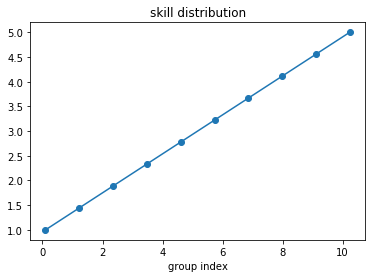

In [102]:
E.s = np.linspace(1,5,num=N)
plt.title('skill distribution')
plt.xlabel('group index')
plt.plot(x,E.s,marker='o');

## Not a Lucas economy

In [103]:
E.Lucas = False
rwc, (Tc,Lc) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [104]:
rwc

array([ 1.1394,  0.7596])

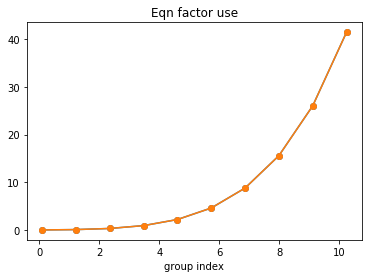

In [105]:
plt.title('Eqn factor use')
plt.xlabel('group index')
plt.plot(x,Tc,marker='o');
plt.plot(x,Lc,marker='o');

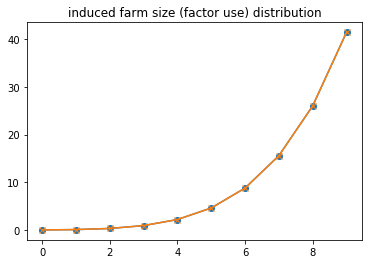

In [106]:
plt.title('induced farm size (factor use) distribution')
plt.plot(Tc,marker='o')
plt.plot(Lc, marker='x');

In [107]:
E.excessD(rwc,Xbar,E.s)   # should be essentially 0

array([-0.0017,  0.0036])

# A Lucas Economy

In [108]:
E.Lucas = True
rwc_L, (Tc_L,Lc_L) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In the Lucas equilibrium there is less unskilled labor (since managers cannot be laborers) so all else equal we would expect higher wages.

In [109]:
rwc, rwc_L

(array([ 1.1394,  0.7596]), array([ 0.9062,  1.2083]))

In this sample equilibrium the two lowest skill groups become pure laborers. 

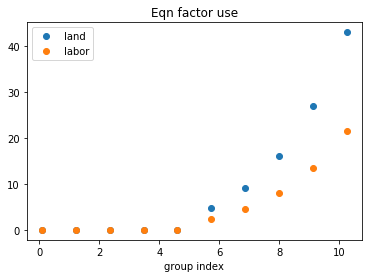

In [110]:
plt.title('Eqn factor use')
plt.xlabel('group index')
plt.plot(x,Tc_L, marker='o', linestyle='None',label='land')
plt.plot(x,Lc_L, marker='o', linestyle='None', label='labor')
plt.legend();

Note that now about 50% of labor is going into management. However this is an artifact of the unform distribution of skill which puts so much population in the higher skill groups.

In [113]:
E.LBAR-sum(Lc_L)

49.999494673258013

Note that the two economies (one Lucas style the other non-Lucas) **are not comparable** because they have fundamentally different production technologies.

In [122]:
E.prodn([Tc_L,Lc_L],E.s)

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   9.019 ,
        17.2082,  30.4912,  50.9431,  81.1389])

In [120]:
sum(E.prodn([Tc_L,Lc_L],E.s))

188.80046352068263

In [123]:
E.prodn([Tc,Lc],E.s)

array([  3.1494e-02,   1.9803e-01,   7.5728e-01,   2.1783e+00,
         5.2085e+00,   1.0940e+01,   2.0873e+01,   3.6985e+01,
         6.1792e+01,   9.8418e+01])

In [121]:
sum(E.prodn([Tc,Lc],E.s))

237.38074731688789

Just out of interest, how much lower would output be in the Non-Lucas economy if every household were self-sufficient.

In [129]:
Tce = np.ones(N)*(E.TBAR/N)
Lce = np.ones(N)*(E.LBAR/N)
sum(E.prodn([Tce,Lce],E.s))

189.28720334405799

In [132]:
E.prodn([Tce,Lce],E.s)

array([  6.3096,   9.1138,  11.9181,  14.7223,  17.5266,  20.3308,
        23.1351,  25.9394,  28.7436,  31.5479])

In [139]:
sum(rwc*[E.TBAR/N, E.LBAR/N])+E.prodn([Tce,Lce],E.s)- 

ValueError: operands could not be broadcast together with shapes (2,) (2,10) 

In [140]:
rwc*[Tc,Lc]

ValueError: operands could not be broadcast together with shapes (2,) (2,10) 

## Market Power distortions

In [ ]:
sum

In [13]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 1.2222  1.2778  1.3333  1.3889  1.4444  1.5   ], 
Lucas = False, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 21.35, 21.35]  [0.33,0.33]   1.00  | 17.36    6.95     6.95 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 18.04, 19.54] [ 0.32, 0.33]  1.02 | 15.67     5.78     0.00     6.37  
 0.10  [ 19.47, 19.49] [ 0.32, 0.32]  1.00 | 16.13     6.30     3.24     6.31  
 0.20  [ 20.94, 19.30] [ 0.33, 0.32]  0.98 | 16.55     6.86     6.55     6.19  
 0.30  [ 23.37, 19.80] [ 0.33, 0.32]  0.96 | 17.47     7.78     9.99     6.30  
 0.40  [ 25.87, 20.30] [ 0.34, 0.32]  0.93 | 18.38     8.77    13.55     6.40  
 0.50  [ 29.38, 20.94] [ 0.35, 0.31]  0.89 | 19.57    10.22    17.39     6.50  
 0.60  [ 33.70, 21.92] [ 0.36, 0.31]  0.85 | 21.06    12.11    21.56     6.69  
 0.70  [ 39.28, 23.

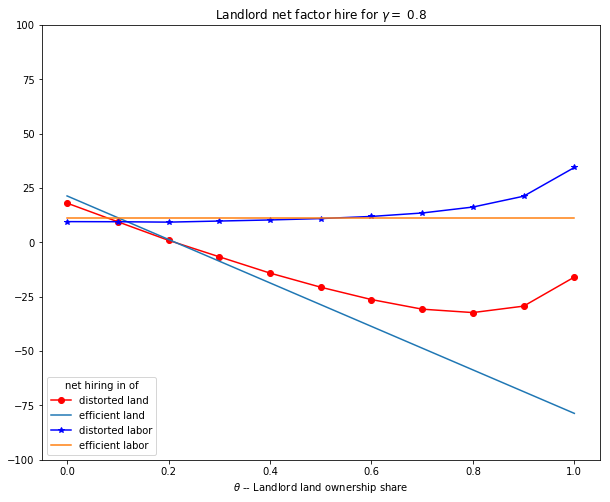

In [14]:
factor_plot(E,Xrc,Xr)

## Lucas = True

In [15]:
E.Lucas = True
rwcl, (Tcl,Lcl) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [16]:
Lcl

array([ 0.    ,  0.    ,  0.    ,  2.0545,  2.5925,  3.2377,  4.0055,
        4.9125,  5.9768,  7.2181])

In [17]:
E.excessD(rwcl,Xbar,E.s)

array([ 0.0018, -0.0024])

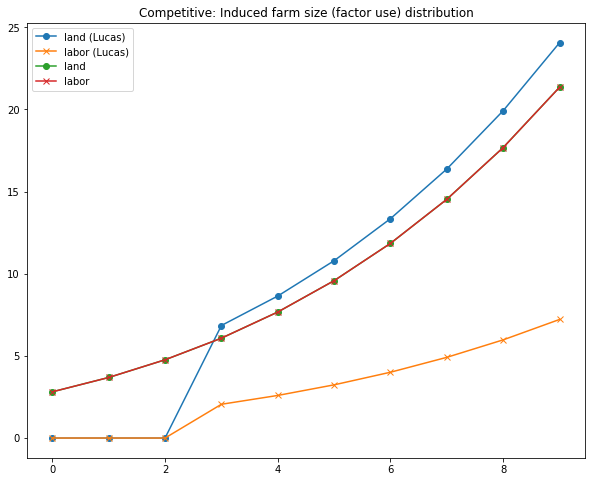

In [18]:
plt.title('Competitive: Induced farm size (factor use) distribution')
plt.plot(Tcl,marker='o',label='land (Lucas)')
plt.plot(Lcl, marker='x',label='labor (Lucas)')
plt.plot(Tc, '-o',label='land ')
plt.plot(Lc, marker='x',label='labor ')
plt.legend();

Not that the two economies are directly comparable (technologies are not the same)... but in the Lucas economy there will be less operating farms and a lower supply of farm labor (since the more skilled become full-time managers).  The farms that do operate will therefore use more land and less labor compared to the non-Lucas economy.

In [19]:
E.Lucas = True
E.smallhold_eq([E.TBAR,E.LBAR/2], E.s)

result(w=array([ 0.1695,  0.7863]), X=array([[  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
         14.335 ,  17.5809,  21.3899,  25.8321],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.    ,   2.4978,
          3.0901,   3.7898,   4.6109,   5.5685]]))

### Cartel equilibria

In [20]:
(Xrcl,Xrl,wcl,wrl) = scene_print(E, numS=10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 1.2222  1.2778  1.3333  1.3889  1.4444  1.5   ], 
Lucas = True, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 24.06,  7.22]  [0.20,0.65]   3.33  | 11.80    4.72     4.72 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 15.93,  6.67] [ 0.21, 0.58]  2.78 |  9.69     3.34     0.00     3.88  
 0.10  [ 18.27,  7.42] [ 0.21, 0.58]  2.70 | 10.69     3.90     2.13     4.27  
 0.20  [ 21.56,  8.50] [ 0.22, 0.57]  2.61 | 12.06     4.69     4.35     4.82  
 0.30  [ 24.21,  9.51] [ 0.22, 0.56]  2.48 | 13.21     5.43     6.73     5.29  
 0.40  [ 29.33, 11.16] [ 0.23, 0.54]  2.33 | 15.21     6.83     9.32     6.06  
 0.50  [ 35.01, 13.36] [ 0.24, 0.52]  2.14 | 17.54     8.57    12.24     7.01  
 0.60  [ 42.46, 16.39] [ 0.26, 0.50]  1.90 | 20.56    11.18    15.80     8.20  
 0.70  [ 47.90, 17.2

Compared to the original scenario the landlord with marker power in the Lucas-scneario faces a countervailing force:  if she pushes the wage too low then she makes self-managed production more attractive for a would-be medium sized farmer who is not now in production. 

From the solution it would appear that the beyond a certain theta there does not appear to be an available way for the landlord to distort further. .

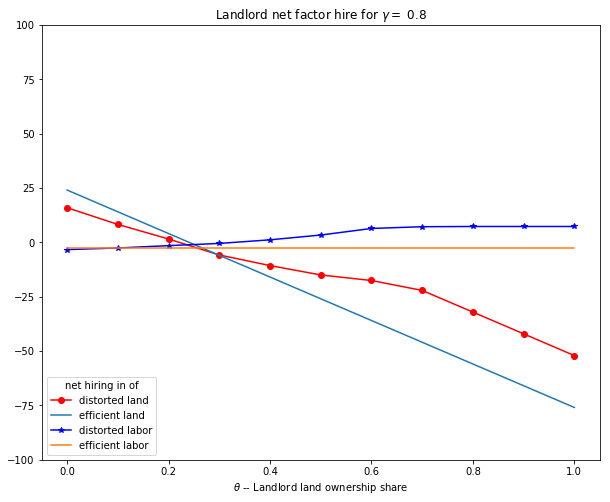

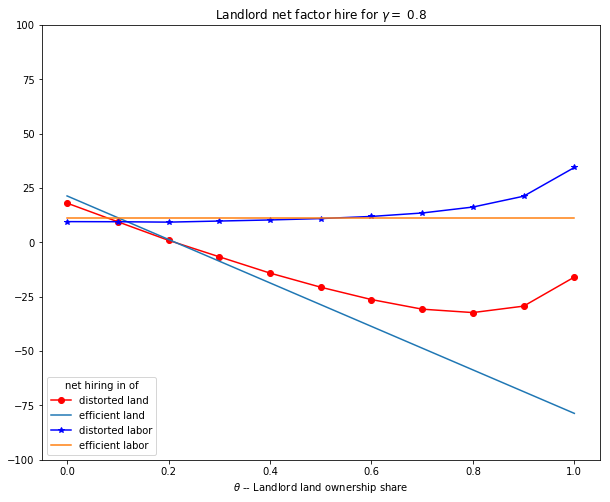

In [21]:
E.Lucas = True
factor_plot(E,Xrcl,Xrl)

E.Lucas = False
factor_plot(E,Xrc,Xr)

In [28]:
E.Lucas = True
E.cartel_eq(0.5)

result(w=array([ 0.2449,  0.5249]), X=array([[  0.    ,   0.    ,   4.2874,   5.4719,   6.9049,   8.6235,
         10.6684,  13.0841,  15.9188,  35.0147],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  13.3939]]))

In [31]:
E.cartel_eq(0.6)

result(w=array([ 0.2322,  0.5438]), X=array([[  0.    ,   0.    ,   4.6839,   5.978 ,   7.5435,   9.421 ,
         11.6551,  14.2942,  17.3911,  29.0069],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  11.0562]]))

In [44]:
E.cartel_eq(0.2)
Lr

array([  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
         4.9766,   6.1035,   7.4259,  13.3939])

Something is still not right... labor used/demanded excees labor supply

In [46]:
(r,w),(Tr,Lr)= E.cartel_eq(0.5)
sum(Lr),np.count_nonzero(Lr)*(E.LBAR)/E.N

(43.696182284960678, 80.0)

In [47]:
sum(Lr)

43.696182284960678

In [49]:
fringe = E.smallhold_eq([E.TBAR,E.LBAR/2], E.s)

In [57]:
fringe.w

array([ 0.1695,  0.7863])

In [58]:
fringe.X

array([[  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
         14.335 ,  17.5809,  21.3899,  25.8321],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.    ,   2.4978,
          3.0901,   3.7898,   4.6109,   5.5685]])

In [59]:
fringe.X[0]

array([  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
        14.335 ,  17.5809,  21.3899,  25.8321])